In [1]:
###Importamos las librerias necesarias:
##TensorFlow, Keras a partir de TensorFlow; y de Keras además importamos el comando para crear capas
import tensorflow as tf #Importamos TensorFlow
#import tensorflow_hub as hub #Importamos esta libreria que contiene modelos preentrenados para poder importarlos
from tensorflow import keras #Importamos keras desde TensorFlow
from tensorflow.keras import layers #Importamos la funcion para crear capas de redes neuronales desde keras
from tensorflow.keras.callbacks import EarlyStopping #Importamos la funcion para realizar el earlystopping desde la libreria de callbacks de keras
from tensorflow.keras.preprocessing import image_dataset_from_directory #Esta función se utiliza para crear un conjunto dataset de imágenes a partir de un directorio en el sistema de archivos. Tambien tiene algunas funcinalidades de preprocesamiento de las imagenes.

##Importamos Pandas para trabajar con DataFrames
import pandas as pd

##Importamos Numpy para incluir mas funciones matematicas
import numpy as np

##Importamos MatPlotLib para realizar representaciones
import matplotlib.pyplot as plt
from matplotlib import gridspec #Es un paquete de matplotlib que permite realizar figuras de varias subfiguras

##Importamos la funcion display de la libreria IPython.display, que permite mostrar contenido de manera mas enriquecida
from IPython.display import display

##Importamos varias funciones de las librerias sklearn
from sklearn.preprocessing import StandardScaler, OneHotEncoder #StandardScaler esacal los datos restando la media y dividiendo por la varianza (normalizacion). #OneHotEncoder convierte variables categoricas en variables que se pueden emplear para modelos de ML
from sklearn.compose import make_column_transformer, make_column_selector #make_column_transformer: permite definir transformaciones para las columnas en conjuntos de datos. #make_column_selector Permite seleccionar columnas de un DataFrame basadas en una variedad de criterios
from sklearn.model_selection import train_test_split #Es una función que se utiliza para dividir un conjunto de datos en conjuntos de entrenamiento y prueba de forma aleatoria.
from sklearn.model_selection import GroupShuffleSplit #Es una funcion que permite dividir conjuntos de datos teniendo en cuenta grupos en los datos
from sklearn.impute import SimpleImputer #Funcion que permite tratar con datos faltantes, como puede ser sustituirlos por otro valor (por ejemplo, la media del resto de datos). Funciona como una transformacion como make_column_transformer: primero se define y luego se aplica al conjunto de datos
from sklearn.pipeline import make_pipeline #Es una herramienta para crear secuencias de transformaciones de datos seguidas de la aplicación de un modelo, todo en un objeto unificado

##Importamos los paquetes os y warnings
import os, warnings #os permite interaccionar con el sistema operativo desde el scrip y warning proporciona alertas sobre el codigo

##Importamos el modulo time para poder medir el tiempo de ejecución del codigo
import time

In [2]:
##Estableccemos las semillas para que la ejecucion del programa pueda ser reproducible
#def set_seed(seed = 31415):
#    np.random.seed(seed) #Estableccemos la semilla de numeros aleatorios en Numpy
#    tf.random.set_seed(seed) #Establecemos la semilla de numeros aleatorios en tensorflow
#    os.environ["PYTHONHASHSEED"] = str(seed) #Establece la semilla para la función de hash de Python
#    os.environ["TF_DETERMINISTIC_OPS"] = "1" #Configura TensorFlow para utilizar operaciones deterministas siempre que sea posible

#Lamamos a la funcion para establecer la semilla
#set_seed()

In [3]:
##En primer lugar importamos el conjunto de datos y generamos los conjuntos de entrenamiento y de validacion
path = "./Data/NN_coincidencias_data.dat" #Ruta de los archivos
df = pd.read_csv(path, sep = "\t", header = "infer", index_col = 0,dtype = np.float64, chunksize = None) #Cargamos los datos de golpe (chunksize = None), empleando tabulaciones como separador, indicando que hay encabezado y que columna se emplea como índice, y el tipo de datos
df.index = df.index.astype(int) #Cambiamos los indices para que sean números enteros

#Separamos los atributos y la varibles que queremos predecir
X = df.iloc[:, list(range(1,125))] #Nos quedamos con los atributos en la variable X
y = df["Coincidencia"].astype(int) #Nos quedamos con la varibles que queremos predecir y convertimos el tipo a int (binario)

#Dividimos los datos en conjunto de entrenamiento y conjunto de validacion tanto para los atributos X como para la varible y
X_train, X_valid, y_train, y_valid = train_test_split(X, y, stratify = y, train_size=0.75) #Con el argumento stratify = y indicamos que haya la misma proporcion de las categorias de y en el conjunto de entrenamiento y en el de validacion

In [13]:
##Definimos la red neuronal para el modelo de clasificación
#Tamaño de la entrada
input_shape = X_train.shape[1]

#Definimos la arqutectura del modelo con la que vamos a trabajar
model = keras.Sequential([
    layers.Dense(256, activation = "relu", input_shape = [input_shape]),
    layers.Dropout(0.3),
    layers.Dense(256, activation = "relu"),
    layers.Dropout(0.3),
    layers.Dense(256, activation = "relu"),
    layers.Dropout(0.3),
    layers.Dense(256, activation = "relu"),
    layers.Dropout(0.3),
    layers.Dense(1, activation = "sigmoid")
])

#Definimos la funcion de coste y el optimizador. así como la metrica para evaluar el ajuste
#Como metricas para evaluar el modelo empleamos el porcentaje clasificado correctamente, los falsos positivos y los falsos negativos
model.compile(
    optimizer = "adam",
    loss = "binary_crossentropy",
    metrics = ["binary_accuracy", tf.keras.metrics.FalseNegatives(), tf.keras.metrics.FalsePositives()], 
)

#Definimos el criterion de convergencia mediante el Early Stopping
early_stopping = EarlyStopping(
    min_delta = 0.001,
    patience = 100,
    restore_best_weights=True
)

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
##Pasamos a realizar el entrenamiento del modelo
history = model.fit(
    X_train, y_train,
    validation_data = (X_valid, y_valid),
    callbacks = [early_stopping],
    batch_size=150,
    epochs=300,
)

Epoch 1/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 184ms/step - binary_accuracy: 0.5453 - false_negatives: 53.7500 - false_positives: 64.7500 - loss: 5992.9365 - val_binary_accuracy: 0.6635 - val_false_negatives: 35.0000 - val_false_positives: 0.0000e+00 - val_loss: 3160.6099
Epoch 2/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - binary_accuracy: 0.6850 - false_negatives: 71.5000 - false_positives: 13.5000 - loss: 3029.5483 - val_binary_accuracy: 0.3365 - val_false_negatives: 0.0000e+00 - val_false_positives: 69.0000 - val_loss: 3555.7905
Epoch 3/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - binary_accuracy: 0.4417 - false_negatives: 4.5000 - false_positives: 144.5000 - loss: 3829.0864 - val_binary_accuracy: 0.8365 - val_false_negatives: 17.0000 - val_false_positives: 0.0000e+00 - val_loss: 48.2008
Epoch 4/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - binary_accuracy: 0.6955 - false_negatives: 48.5000 - false_positives: 32.7500 - loss: 1723.8280 - val_binary_accuracy: 0.6635 - val_false_negatives: 35.00

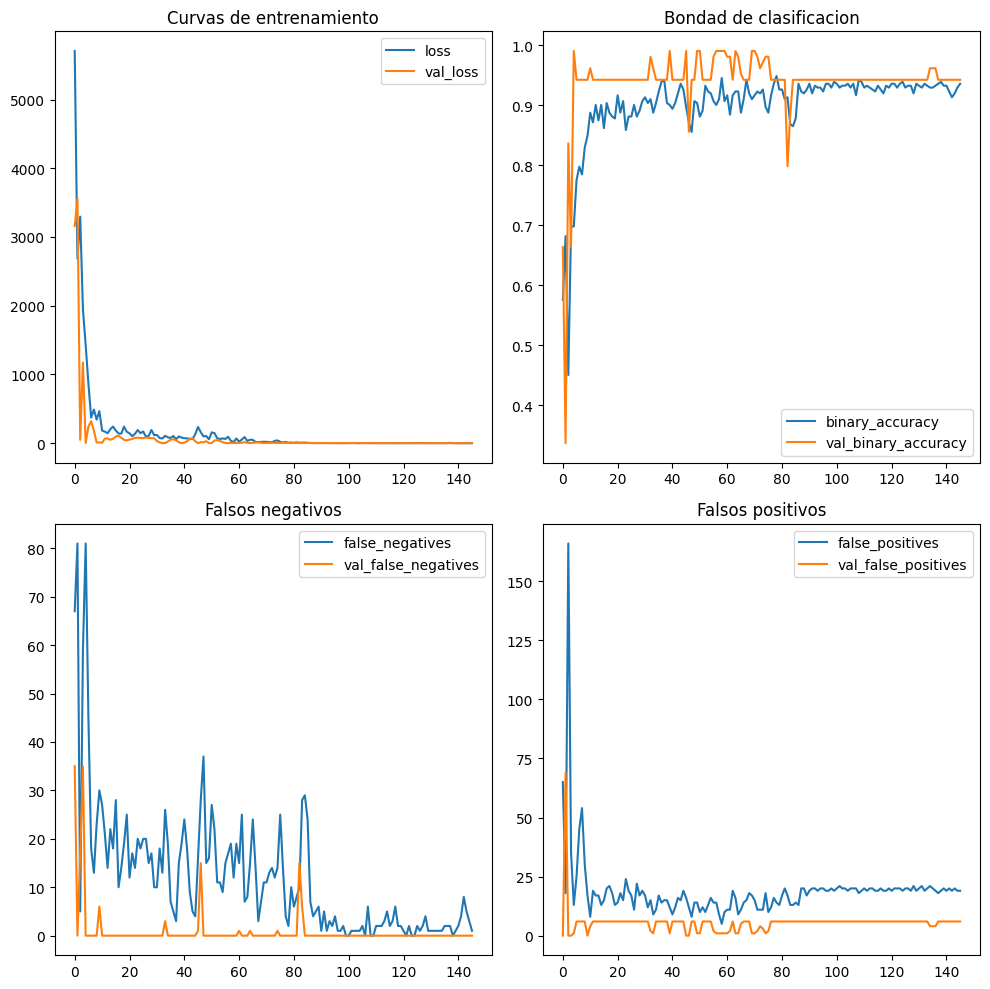

In [16]:
##Convertimos los resultados en un DataFrame y representamos las curvas de aprendizaje y la métrica "binary_accuracy"
history_df = pd.DataFrame(history.history)

#Creamos la figura y la grid donde añadir los graficos
figure = plt.figure(figsize = (10, 10)) #Definimos la figura y su tamaño
grid = gridspec.GridSpec(2, 2, width_ratios = [1, 1]) #Definimos la grid de la figuraa junto con el numero de filas y columnas y el ratio de achos de cada columna

#Añadimos el primer grafico al primer espacio de la cuadricula
ax0 = plt.subplot(grid[0])
history_df.loc[:, ["loss", "val_loss"]].plot(ax = ax0) #Con el argumento de la funcion plot() ax = ax0 indicamos que el grafico correspoda el hueco de la grid asociado a ax0
ax0.set_title('Curvas de entrenamiento')

#Añadimos el segundo grafico al segundo hueco de la cuadricula
ax1 = plt.subplot(grid[1])
history_df.loc[:, ["binary_accuracy", "val_binary_accuracy"]].plot(ax = ax1)
ax1.set_title("Bondad de clasificacion")

#Añadimos el tercer grafico al tercer hueco de la cuadricula
ax2 = plt.subplot(grid[2])
history_df.loc[:, ["false_negatives", "val_false_negatives"]].plot(ax = ax2)
ax2.set_title("Falsos negativos")

#Añadimos el cuarto gráfico al cuarto hueco de la cuadricula
ax3 = plt.subplot(grid[3])
history_df.loc[:, ["false_positives", "val_false_positives"]].plot(ax = ax3)
ax3.set_title("Falsos positivos")

#Mostramos el grafico
plt.tight_layout()  # Ajusta automáticamente los parámetros de la subtrama
plt.show()